### **Understanding Correlation**

**What is Correlation?**

Correlation is a statistical measure that describes the strength and direction of a relationship between two continuous variables.

It is used to identify whether an increase in one variable is associated with an increase, decrease, or no change in another variable.

**Types of Correlation**:
	
- Positive Correlation: As one variable increases, the other also increases.
- Negative Correlation: As one variable increases, the other decreases.
- No Correlation: No consistent pattern in the relationship between the two variables.

**Mathematical Definition**:

The most common measure of correlation is the Pearson Correlation Coefficient (r):

``r = COV(X, Y)\(sigma_X*sigma_Y)``

r ranges between -1 and +1
- r = +1: Perfect positive correlation.
- r = -1: Perfect negative correlation.
- r =  0: No correlation.



**Covariance vs Correlation**:

- Covariance measures the direction of a relationship between two variables, but it is affected by the scale of the variables.

- Correlation standardizes the covariance, making it easier to interpret because it is scale-independent.

In [10]:
import numpy as np
import pandas as pd

# Height and weight data
data = {
"Height (cm)": [150, 160, 170, 180, 190],
"Weight (kg)": [50, 60, 70, 80, 90]
}

df = pd.DataFrame(data)

# Calculate the covariance
covariance = df["Height (cm)"].cov(df["Weight (kg)"])
print(f"Covariance: {covariance: .2f}")

# Calculate the correlation
correlation = df["Height (cm)"].corr(df["Weight (kg)"])
print(f"Pearson correlation: {correlation: .2f}")

Covariance:  250.00
Pearson correlation:  1.00


- The covariance has a value of 250, which is difficult to interpret without knowing the units.
- The correlation of 1.00 shows a perfect positive relationship, meaning that height and weight increase together in perfect proportion.

**Interpreting Correlation Values**:

| Correlation Coefficient \( r \) | Interpretation                   |
|---------------------------------|----------------------------------|
| \( r > 0.7 \)                   |   Strong positive correlation    |
| \( 0.3 < r < 0.7 \)             | Moderate positive correlation    |
| \( r < 0.3 \)                   | Weak positive correlation        |
| \( r = 0 \)                     | Negative correlation*            | 

**Visualizing Correlation with Python**

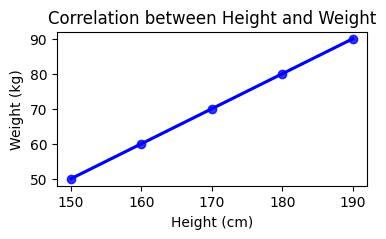

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 2))

# Visualize the scatter plot with the regression line
sns.regplot(x="Height (cm)", y="Weight (kg)", data=df, color="blue")
plt.title("Correlation between Height and Weight")
plt.show()

### **Linear Regression Models with Scikit-learn**

**What is Linear Regression?**

Linear Regression is a statistical method used to model the relationship between a dependent variable (Y) and one or more independent variables (X).

It is one of the simplest and most widely used regression techniques.


**Objectives of Bivariate Analysis**:

- Understand the relationship between two variables (e.g., height and weight).
- Determine whether one variable depends on the other.
- Identify the strength of the relationship between the two variables.
- Visualize this relationship using scatter plots.

Examples of Bivariate Data:

- Height (X) and Weight (Y) of a sample of people.
- Temperature (X) and Precipitation (Y) at a weather station.
- Stock market valuation (X) and earnings (Y) of companies.

Studying pairwise relationships between data is often very useful for understanding a phenomenon.

It helps to:
- Highlight relationships between different aspects of the phenomenon.
- Identify redundancies in its description.

In [1]:
pip install pandas plotnine openpyxl seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from plotnine import ggplot, aes, geom_point  # exemple de base
import seaborn as sns
import matplotlib.pyplot as plt

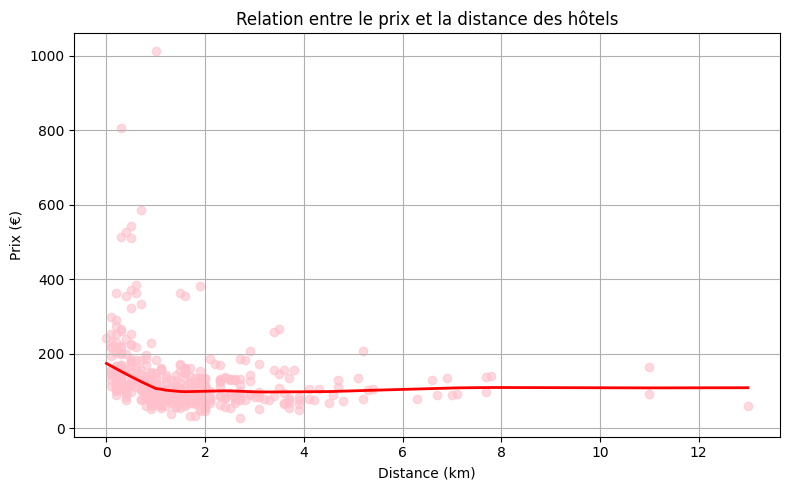

In [25]:
# Créer un scatterplot avec ligne lissée (lowess = TRUE)
plt.figure(figsize=(8, 5))
sns.regplot(
    x='distance',
    y='price',
    data=hotelsvienna,
    lowess=True,
    scatter_kws={'alpha': 0.6, 'color': 'pink'},
    line_kws={'color': 'red', 'linewidth': 2}
)

# Ajouter un titre et les étiquettes
plt.title("Relation entre le prix et la distance des hôtels")
plt.xlabel("Distance (km)")
plt.ylabel("Prix (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
correlation_coefficient, p_value = pearsonr(hotelsvienna["distance"], hotelsvienna["price"])
print(f"Coefficient de corrélation : {correlation_coefficient:.4f}")
print(f"P-value associée : {p_value:.2e}")

Coefficient de corrélation : -0.2093
P-value associée : 1.27e-05


Un coefficient de corrélation proche de 0 indique une relation linéaire faible. 

Un coefficient de corrélation proche de 1 ou -1 indique une relation linéaire forte.

Les graphiques suggèrent une relation linéaire décroissante entre le prix et les variables de distance.

**Donc il existe une relation linéaire faible et décroissante entre le prix et les de distance.**

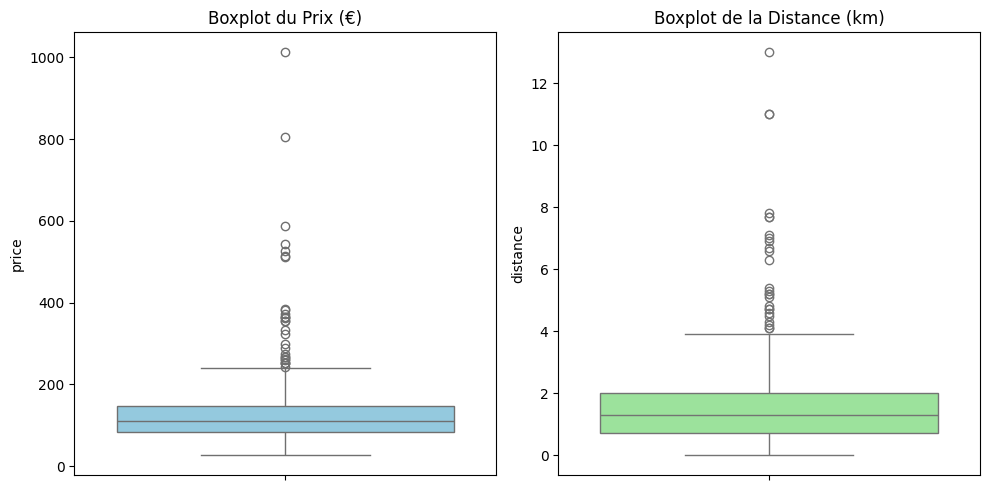

In [32]:
# Création des deux boxplots côte à côte
plt.figure(figsize=(10, 5))

# Boxplot pour 'price'
plt.subplot(1, 2, 1)
sns.boxplot(y=hotelsvienna['price'], color='skyblue')
plt.title("Boxplot du Prix (€)")

# Boxplot pour 'distance'
plt.subplot(1, 2, 2)
sns.boxplot(y=hotelsvienna['distance'], color='lightgreen')
plt.title("Boxplot de la Distance (km)")

plt.tight_layout()
plt.show()

In [35]:
import pandas as pd
import statsmodels.api as sm

# Définir X (distance) et Y (price)
X = hotelsvienna["distance"]
y = hotelsvienna["price"]

# Ajouter constante (intercept)
X = sm.add_constant(X)

# Créer le modèle de régression
model = sm.OLS(y, X).fit()

# Afficher le résumé
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     19.51
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           1.27e-05
Time:                        12:29:25   Log-Likelihood:                -2530.6
No. Observations:                 428   AIC:                             5065.
Df Residuals:                     426   BIC:                             5073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.2924      6.255     24.187      0.0

In [36]:
# Définir les variables indépendantes (distance, stars)
X = hotelsvienna[["distance", "stars"]]
X = sm.add_constant(X)  # Ajouter l'intercept (constante)

# Variable dépendante
y = hotelsvienna["price"]

# Ajuster le modèle
model = sm.OLS(y, X).fit()

# Résumé du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     38.94
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           2.97e-16
Time:                        12:42:26   Log-Likelihood:                -2504.2
No. Observations:                 428   AIC:                             5014.
Df Residuals:                     425   BIC:                             5027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7067     20.095      0.384      0.7

In [41]:
import pandas as pd
import statsmodels.api as sm

# 🔹 Étape 1 : Charger le fichier Excel
df = pd.read_excel("marketingdata.xlsx")

# 🔹 Étape 2 : Définir les variables
X = df[['youtube', 'facebook', 'newspaper']]
X = sm.add_constant(X)  # ajouter intercept
y = df['sales']
# 🔹 Étape 3 : Ajuster lemodèle
model = sm.OLS(y, X).fit()
# 🔹 Étape 4 : Résumé du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           1.58e-96
Time:                        14:33:54   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.0